<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загружаем-и-получаем-информацию-о-датасете" data-toc-modified-id="Загружаем-и-получаем-информацию-о-датасете-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загружаем и получаем информацию о датасете</a></span></li><li><span><a href="#Лемматизация-и-очистка-от-лишних-символов" data-toc-modified-id="Лемматизация-и-очистка-от-лишних-символов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Лемматизация и очистка от лишних символов</a></span></li><li><span><a href="#Выделение-целевого-признака-и-признаков" data-toc-modified-id="Выделение-целевого-признака-и-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выделение целевого признака и признаков</a></span></li><li><span><a href="#Вывод-по-пункту" data-toc-modified-id="Вывод-по-пункту-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод по пункту</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Балансирование-класса-с-помощью-class_weight='balance'" data-toc-modified-id="Балансирование-класса-с-помощью-class_weight='balance'-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Балансирование класса с помощью class_weight='balance'</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия---LogisticRegression" data-toc-modified-id="Логистическая-регрессия---LogisticRegression-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Логистическая регрессия - LogisticRegression</a></span></li><li><span><a href="#Решающее-дерево---DecisionTreeClassifier" data-toc-modified-id="Решающее-дерево---DecisionTreeClassifier-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Решающее дерево - DecisionTreeClassifier</a></span></li><li><span><a href="#Случайный-лес---RandomForestClassifier" data-toc-modified-id="Случайный-лес---RandomForestClassifier-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Случайный лес - RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Лучшая-модель" data-toc-modified-id="Лучшая-модель-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Лучшая модель</a></span></li><li><span><a href="#Тестирование-на-лучшей-модели" data-toc-modified-id="Тестирование-на-лучшей-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Тестирование на лучшей модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Обучение модели классификации комментариев

Интернет-магазин запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Требуется обучить модель классифицировать комментарии на позитивные и негативные. В распоряжении набор данных с разметкой о токсичности правок.

Необходимо построить модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузить и подготовить данные.
2. Обучить разные модели. 
3. Сделать выводы.


**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
# установим последнюю версию scikit-learn#
!pip install scikit-learn==1.1.3

In [2]:
!pip install pymystem3

In [3]:
!pip install lightgbm

In [4]:
!pip install imbalanced-learn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymystem3 import Mystem

import re 
import time
from tqdm import notebook

from imblearn.under_sampling import RandomUnderSampler

import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, make_pipeline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
    cross_val_score,
    cross_validate
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve
)

In [6]:
nltk.download('stopwords')  
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manyak_pro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manyak_pro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/manyak_pro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
# игнорирование предупреждений
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [8]:
# константа
RANDOM_STATE = 12345

### Загружаем и получаем информацию о датасете

**Считаем данные из csv-файлов в датафрейм и сохраним в переменные data.**

Данные находятся в файле:

- toxic_comments.csv 

Путь к файлу:

- /datasets/toxic_comments.csv

In [9]:
data = pd.read_csv('/datasets/toxic_comments.csv',index_col=[0])

**Функция по выводу основной информации по датафреймам**

**Вывод первых 5 строк датафрейма**

In [10]:
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Можно заметить, что комментарии на английском языке представлены.

**Выведим основную информацию о датафрейме.**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


**Кол-во уникальных дупликатов**

In [12]:
data.duplicated().sum()

0

Баланс классов

Нам необходимо будет решать задачу классификации. Посмотрим как в целевом признаке рапределены ответы.

0    0.898388
1    0.101612
Name: toxic, dtype: float64


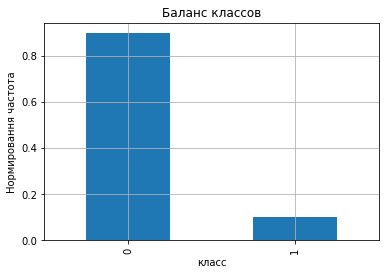

In [13]:
class_frequency = data['toxic'].value_counts(normalize=True) 
print(class_frequency)
class_frequency.plot(kind='bar',
                    grid=True)
plt.title("Баланс классов")
plt.xlabel("класс")
plt.ylabel("Нормировання частота")
plt.show()

По гистограмме наблюдается несбаласированность классов. Проверять на константной модели нет необходимости.


Для балансировки классов можно выполнить: 
- уменьшение выборки с ответом 0 . 
- увеличение выборки с 1 до кол-ва ответов с 0.
- Взвешивание классов

Второй способ предлагается сразу отбросить, так как увеличивать придется много значений с ответом 1, что приведет к неточности в обучении. Третий способ тоже отбросим так как придется избавится от большого кол-ва строк.

В данном проекте будем выполнять взвешивание классов.

Но для начала необходимо подготовить признаки в столбце 'text'.

### Лемматизация и очистка от лишних символов

**Создадим функцию лемматизации и очистки от лишних слов**

In [14]:
#очистка от лишних слов и приведенеие к нижнему регистру
def text_clear(data):
    text = data
    text_clear = re.sub(r'[^a-zA-Z]', ' ', text).lower() 
    b = text_clear.split()
    corpus = " ".join(b) 
    return corpus

In [15]:
%%time
data['cl_text'] = data['text'].apply(text_clear)

CPU times: user 3.48 s, sys: 25.3 ms, total: 3.51 s
Wall time: 3.5 s


In [16]:
data.head()

,text,toxic,cl_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m se...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it s...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestions on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...


In [17]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [18]:
lemmatizer = WordNetLemmatizer()

In [19]:
all_index = data.index
data['lemmatize_text'] = 0
for i in notebook.tqdm(all_index):
    word = data.loc[i,'cl_text']
    data.loc[i,'lemmatize_text'] = lemmatizer.lemmatize(word, get_wordnet_pos(word))

  0%|          | 0/159292 [00:00<?, ?it/s]

In [20]:
data.head()

,text,toxic,cl_text,lemmatize_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m se...,d aww he matches this background colour i m se...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it s...,hey man i m really not trying to edit war it s...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestions on impr...,more i can t make any real suggestions on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...,you sir are my hero any chance you remember wh...


In [21]:
#data.to_csv('data_lemmatize.csv')

In [22]:
data_lem = data.copy().drop(['text','cl_text'], axis=1)

In [23]:
data_lem.head()

,toxic,lemmatize_text
0,0,explanation why the edits made under my userna...
1,0,d aww he matches this background colour i m se...
2,0,hey man i m really not trying to edit war it s...
3,0,more i can t make any real suggestions on impr...
4,0,you sir are my hero any chance you remember wh...


### Выделение целевого признака и признаков

**Выделим целевой признак и признаки**

In [24]:
target = data_lem['toxic']
features = data_lem.drop('toxic', axis=1)

**Разбиение выборок на обучающие и тестовые**

Разобьем датафрейм на обусающую и тестовую выборки в соотношении 80:20

In [25]:
X_train, X_test, y_train, y_test =\
train_test_split(features, 
                 target, 
                 test_size=0.2, 
                 random_state=RANDOM_STATE,
                 stratify=target)

**Классификация тональности текста**

In [26]:
stop_words = list(set(nltk_stopwords.words('english')) )

### Вывод по пункту

В данном пункте:
- изучили датасет. Строк: 159292. Столбцов: 2. столбцы соответсвуют своему типу данных. тексту требуется дополнительная обработка.
- явные дупликаты отсуствуют
- наблюдается дисбаланс классов. Ответов с 0 составляет около 90%
- была выполнена лемматизация и очистка от лишних символов

Для борьбы с дисбалансом принято решение рассмотреть способ class_weight.
Для данных способов была выполнена разбивка выборок на тренироввочную и тестовую. Разбивки в обоих случаях были в соотношении 80:20

## Обучение

Рассмотрим 3 модели:

- Решающее дерево
- Случайный лес
- Логистическая регрессия

Меняя гиперпараметры каждой модели выберим наилучшую. Определять лучшую модель будем по F1 метрике

### Балансирование класса с помощью class_weight='balance'

In [27]:
all_parametrs_cw = []
all_f1_cw = []

#### Логистическая регрессия - LogisticRegression

In [28]:
%%time
pipe_lr = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words=stop_words) ),
    ('model_lr', LogisticRegression(random_state = RANDOM_STATE))]
)

CPU times: user 59 µs, sys: 15 µs, total: 74 µs
Wall time: 78 µs


In [29]:
%%time

pipe_lr.fit(X_train['lemmatize_text'], y_train)

CPU times: user 25.7 s, sys: 427 ms, total: 26.1 s
Wall time: 7.82 s


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['hers', 'doing', 's', 'until',
                                             'ourselves', 'between', 'few',
                                             'does', 'yours', 'they', "doesn't",
                                             'the', 'its', "you're", 'over',
                                             'now', 'where', 'of', 'she',
                                             'theirs', 'mustn', 'what',
                                             'yourself', "you've", 'your',
                                             'all', 'each', 'such', "wouldn't",
                                             'only', ...])),
                ('model_lr', LogisticRegression(random_state=12345))])

In [30]:
%%time
# словарь с гиперпараметрами и значениями, которые хотим перебрать
param_grid_linear = {
    'model_lr__class_weight':['balanced'],
    'model_lr__solver': ['liblinear',
                             'newton-cg',
                             'newton-cholesky'
                            ],
    'model_lr__C': ([x for x in range(1, 15,1)]),
    'model_lr__penalty': ('l1','l2',None),
    'model_lr__max_iter':([100])
}

CPU times: user 66 µs, sys: 1 µs, total: 67 µs
Wall time: 7.87 µs


In [31]:
%%time
gs_linear = GridSearchCV(
    pipe_lr, 
    cv=3,
    param_grid=param_grid_linear,
    scoring='f1', 
    n_jobs=-1
)

CPU times: user 159 µs, sys: 7 µs, total: 166 µs
Wall time: 22.2 µs


In [32]:
%%time
gs_linear.fit(X_train['lemmatize_text'], y_train)

CPU times: user 1min 9s, sys: 24.6 s, total: 1min 34s
Wall time: 5min 24s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words=['hers',
                                                                    'doing',
                                                                    's',
                                                                    'until',
                                                                    'ourselves',
                                                                    'between',
                                                                    'few',
                                                                    'does',
                                                                    'yours',
                                                                    'they',
                                                                    "doesn't",
                                                                    'the',
                                                                    'its',
                                                                    "you're",
                                                                    'over',
                                                                    'now',
                                                                    'where',
                                                                    'of', 'she',
                                                                    'theirs',
                                                                    'mustn',
                                                                    'what',
                                                                    'yourself',
                                                                    "you've",
                                                                    'your',
                                                                    'all',
                                                                    'each',
                                                                    'such',
                                                                    "wouldn't",
                                                                    'only', ...])),
                                       ('model_lr',
                                        LogisticRegression(random_state=12345))]),
             n_jobs=-1,
             param_grid={'model_lr__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'model_lr__class_weight': ['balanced'],
                         'model_lr__max_iter': [100],
                         'model_lr__penalty': ('l1', 'l2', None),
                         'model_lr__solver': ['liblinear', 'newton-cg',
                                              'newton-cholesky']},
             scoring='f1')

In [33]:
# лучшее значение F1
print(f'best_score: {gs_linear.best_score_}')

# лучшие гиперпараметры
print(f'best_params: {gs_linear.best_params_}')

best_score: 0.7666695651222751
best_params: {'model_lr__C': 8, 'model_lr__class_weight': 'balanced', 'model_lr__max_iter': 100, 'model_lr__penalty': 'l2', 'model_lr__solver': 'liblinear'}


In [34]:
all_parametrs_cw.append(gs_linear.best_params_)
all_f1_cw.append(gs_linear.best_score_)

#### Решающее дерево - DecisionTreeClassifier

In [35]:
pipe_tree = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words=stop_words) ),
    ('model_tr', DecisionTreeClassifier(random_state=RANDOM_STATE))]
)

In [36]:
%%time
pipe_tree.fit(X_train['lemmatize_text'], y_train)

CPU times: user 5min 9s, sys: 691 ms, total: 5min 10s
Wall time: 5min 10s


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['hers', 'doing', 's', 'until',
                                             'ourselves', 'between', 'few',
                                             'does', 'yours', 'they', "doesn't",
                                             'the', 'its', "you're", 'over',
                                             'now', 'where', 'of', 'she',
                                             'theirs', 'mustn', 'what',
                                             'yourself', "you've", 'your',
                                             'all', 'each', 'such', "wouldn't",
                                             'only', ...])),
                ('model_tr', DecisionTreeClassifier(random_state=12345))])

In [37]:
%%time
# словарь с гиперпараметрами и значениями, которые хотим перебрать
param_grid_tree = {
    'model_tr__criterion':['gini','entropy','log_loss'],
    'model_tr__class_weight':['balanced'],
    'model_tr__max_depth': [25,30]
}

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


In [38]:
%%time
gs_tree = GridSearchCV(
    pipe_tree, 
    cv=3,
    param_grid=param_grid_tree,
    scoring='f1', 
    n_jobs=-1
)

CPU times: user 12 µs, sys: 8 µs, total: 20 µs
Wall time: 23.8 µs


In [39]:
%%time
gs_tree.fit(X_train['lemmatize_text'], y_train)

CPU times: user 23.1 s, sys: 1.59 s, total: 24.7 s
Wall time: 1min 29s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words=['hers',
                                                                    'doing',
                                                                    's',
                                                                    'until',
                                                                    'ourselves',
                                                                    'between',
                                                                    'few',
                                                                    'does',
                                                                    'yours',
                                                                    'they',
                                                                    "doesn't",
                                                                    'the',
                                                                    'its',
                                                                    "you're",
                                                                    'over',
                                                                    'now',
                                                                    'where',
                                                                    'of', 'she',
                                                                    'theirs',
                                                                    'mustn',
                                                                    'what',
                                                                    'yourself',
                                                                    "you've",
                                                                    'your',
                                                                    'all',
                                                                    'each',
                                                                    'such',
                                                                    "wouldn't",
                                                                    'only', ...])),
                                       ('model_tr',
                                        DecisionTreeClassifier(random_state=12345))]),
             n_jobs=-1,
             param_grid={'model_tr__class_weight': ['balanced'],
                         'model_tr__criterion': ['gini', 'entropy', 'log_loss'],
                         'model_tr__max_depth': [25, 30]},
             scoring='f1')

In [40]:
# лучшее значение F1
print(f'best_score: {gs_tree.best_score_}')

# лучшие гиперпараметры
print(f'best_params: {gs_tree.best_params_}')

best_score: 0.6256914886722718
best_params: {'model_tr__class_weight': 'balanced', 'model_tr__criterion': 'entropy', 'model_tr__max_depth': 25}


In [41]:
all_parametrs_cw.append(gs_tree.best_params_)
all_f1_cw.append(gs_tree.best_score_)

#### Случайный лес - RandomForestClassifier

In [42]:
pipe_forest = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words=stop_words) ),
    ('model_fr', RandomForestClassifier(random_state=RANDOM_STATE))]
)

In [43]:
%%time
pipe_forest.fit(X_train['lemmatize_text'], y_train)

CPU times: user 5min 29s, sys: 549 ms, total: 5min 30s
Wall time: 5min 30s


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['hers', 'doing', 's', 'until',
                                             'ourselves', 'between', 'few',
                                             'does', 'yours', 'they', "doesn't",
                                             'the', 'its', "you're", 'over',
                                             'now', 'where', 'of', 'she',
                                             'theirs', 'mustn', 'what',
                                             'yourself', "you've", 'your',
                                             'all', 'each', 'such', "wouldn't",
                                             'only', ...])),
                ('model_fr', RandomForestClassifier(random_state=12345))])

In [44]:
%%time
# словарь с гиперпараметрами и значениями, которые хотим перебрать
param_grid_forest = {
    'model_fr__criterion':['gini','entropy','log_loss'],
    'model_fr__class_weight':['balanced'],
    'model_fr__n_estimators': [20,30,50],
    'model_fr__max_depth': [10,20,30]
}

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs


In [45]:
%%time
gs_forest = GridSearchCV(
    pipe_forest, 
    cv=3,
    param_grid=param_grid_forest,
    scoring='f1', 
    n_jobs=-1
)

CPU times: user 13 µs, sys: 5 µs, total: 18 µs
Wall time: 20 µs


In [46]:
%%time
gs_forest.fit(X_train['lemmatize_text'], y_train)

CPU times: user 19.2 s, sys: 4.54 s, total: 23.8 s
Wall time: 1min 47s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words=['hers',
                                                                    'doing',
                                                                    's',
                                                                    'until',
                                                                    'ourselves',
                                                                    'between',
                                                                    'few',
                                                                    'does',
                                                                    'yours',
                                                                    'they',
                                                                    "doesn't",
                                                                    'the',
                                                                    'its',
                                                                    "you're",
                                                                    'over',
                                                                    'now',
                                                                    'where',
                                                                    'of', 'she',
                                                                    'theirs',
                                                                    'mustn',
                                                                    'what',
                                                                    'yourself',
                                                                    "you've",
                                                                    'your',
                                                                    'all',
                                                                    'each',
                                                                    'such',
                                                                    "wouldn't",
                                                                    'only', ...])),
                                       ('model_fr',
                                        RandomForestClassifier(random_state=12345))]),
             n_jobs=-1,
             param_grid={'model_fr__class_weight': ['balanced'],
                         'model_fr__criterion': ['gini', 'entropy', 'log_loss'],
                         'model_fr__max_depth': [10, 20, 30],
                         'model_fr__n_estimators': [20, 30, 50]},
             scoring='f1')

In [47]:
# лучшее значение F1
print(f'best_score: {gs_forest.best_score_}')

# лучшие гиперпараметры
print(f'best_params: {gs_forest.best_params_}')

best_score: 0.4351608471967743
best_params: {'model_fr__class_weight': 'balanced', 'model_fr__criterion': 'gini', 'model_fr__max_depth': 30, 'model_fr__n_estimators': 50}


In [48]:
all_parametrs_cw.append(gs_forest.best_params_)
all_f1_cw.append(gs_forest.best_score_)

### Лучшая модель

In [49]:
all_model =['LinearRegression','DecisionTreeClassifier','RandomForestClassifier']

In [50]:
result_1 = pd.DataFrame([all_model,
                        all_parametrs_cw,
                        all_f1_cw], 
                        index=['model',
                               'best_parametrs_class_weight',
                               'f1_class_weight'
                              ]
                       )

In [51]:
pd.options.display.max_colwidth = 0
result_1.T

,model,best_parametrs_class_weight,f1_class_weight
0,LinearRegression,"{'model_lr__C': 8, 'model_lr__class_weight': 'balanced', 'model_lr__max_iter': 100, 'model_lr__penalty': 'l2', 'model_lr__solver': 'liblinear'}",0.76667
1,DecisionTreeClassifier,"{'model_tr__class_weight': 'balanced', 'model_tr__criterion': 'entropy', 'model_tr__max_depth': 25}",0.625691
2,RandomForestClassifier,"{'model_fr__class_weight': 'balanced', 'model_fr__criterion': 'gini', 'model_fr__max_depth': 30, 'model_fr__n_estimators': 50}",0.435161


Лучше всего себя показала модель Логистическая регрессия - LogisticRegression с уменьшенным кол-вом выборки. На ней и будем выполнять теститорование модели.

### Тестирование на лучшей модели

In [52]:
pipe_linear_1 = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words=stop_words) ),
    ('model_lr_res', LogisticRegression(
        solver= 'liblinear',
        class_weight ='balanced',
        C = 8,
        max_iter=100,
        penalty = 'l2',
        random_state=RANDOM_STATE)
    )]
)

pipe_linear_1.fit(X_train['lemmatize_text'], y_train)
prediction_1 = pipe_linear_1.predict(X_test['lemmatize_text'])
f11 = f1_score(y_test, prediction_1)
print('F1_Score is:', f11)

F1_Score is: 0.774025974025974


**ROC-кривая и PR-кривая**

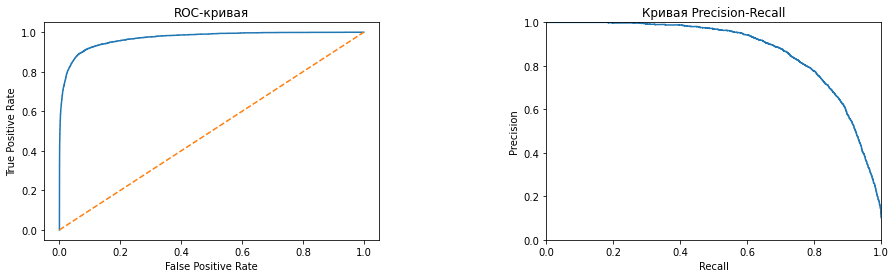

In [53]:
probabilities_test = pipe_linear_1.predict_proba(X_test['lemmatize_text']) 
probabilities_one_test = probabilities_test[:, 1]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,4))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test) 

axes[0].plot(fpr, tpr)
axes[0].plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0]) 
plt.xlim([0.0, 1.0])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC-кривая') 

precision, recall, thresholds = precision_recall_curve(y_test,
                                                       probabilities_one_test)


plt.step(recall, precision, where='post') 
plt.ylim([0.0, 1.0]) 
plt.xlim([0.0, 1.0])
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Кривая Precision-Recall') 

plt.show()

In [54]:
print('F1 мера наилучшей модели на тестовой выборке:', f1_score(y_test,prediction_1))
print('Полнота наилучшей модели на тестовой выборке:', recall_score(y_test,prediction_1))
print('Точность наилучшей модели на тестовой выборке:', precision_score(y_test, prediction_1))
print('AUC-ROC наилучшей модели на тестовой выборке:',roc_auc_score(y_test, prediction_1))

F1 мера наилучшей модели на тестовой выборке: 0.774025974025974
Полнота наилучшей модели на тестовой выборке: 0.8285449490268767
Точность наилучшей модели на тестовой выборке: 0.7262388302193339
AUC-ROC наилучшей модели на тестовой выборке: 0.8966112349075408


F1 не меньше 0.75. Модель хорошо прогнозирует на укороченной выборке.
Полнота и точность стремятся к 1. Значения адекватно предсказываются.

## Выводы

Интернет-магазину для нового сервиса небходима обученная машинная модель, которая будет искать токсичные комментарии и отправлять их на модерацию.  

Обученная модель должна классифицировать комментарии на позитивные и негативные. Интернет-магазин предоставил набор данных с разметкой о токсичности правок.
Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

Необходимо было построить модель со значением метрики качества *F1* не меньше 0.75. 

Для достижения поставленных целей были выполнены следующие Шаги:

- ШАГ 1. 

В данном пункте:
- изучили датасет. Строк: 159292. Столбцов: 2. столбцы соответсвуют своему типу данных. тексту требуется дополнительная обработка.
- явные дупликаты отсуствуют
- наблюдается дисбаланс классов. Ответов с 0 составляет около 90%
- была выполнена лемматизация и очистка от лишних символов

Для борьбы с дисбалансом принято решение рассмотреть способ class_weight.
Для данных способов была выполнена разбивка выборок на тренироввочную и тестовую. Разбивки в обоих случаях были в соотношении 80:20


- ШАГ 2.

Рассмотрим 3 модели:

- Решающее дерево
- Случайный лес
- Логистическая регрессия

И обучили их при рахных параметрах и выборках.

In [55]:
pd.options.display.max_colwidth = 0
result_1.T

,model,best_parametrs_class_weight,f1_class_weight
0,LinearRegression,"{'model_lr__C': 8, 'model_lr__class_weight': 'balanced', 'model_lr__max_iter': 100, 'model_lr__penalty': 'l2', 'model_lr__solver': 'liblinear'}",0.76667
1,DecisionTreeClassifier,"{'model_tr__class_weight': 'balanced', 'model_tr__criterion': 'entropy', 'model_tr__max_depth': 25}",0.625691
2,RandomForestClassifier,"{'model_fr__class_weight': 'balanced', 'model_fr__criterion': 'gini', 'model_fr__max_depth': 30, 'model_fr__n_estimators': 50}",0.435161


Лучше всего себя показала модель Логистическая регрессия - LogisticRegression с уменьшенным кол-вом выборки. На ней и будем выполнять теститорование модели.

Гиперпараметры такой модели: {'model_lr__C': 8, 'model_lr__class_weight': 'balanced', 'model_lr__max_iter': 100, 'model_lr__penalty': 'l2', 'model_lr__solver': 'liblinear'}

Выполнив проверку модели на тестовой выборке получили:

- F1 мера наилучшей модели на тестовой выборке: 0.774025974025974
- Полнота наилучшей модели на тестовой выборке: 0.8285449490268767
- Точность наилучшей модели на тестовой выборке: 0.7262388302193339
- AUC-ROC наилучшей модели на тестовой выборке: 0.8966112349075408

Так как F1 не меньше 0.75, то модель нам подходит. 